# Clasificación Regresión Logística (Iris dataset)

Ignacio Díaz Blanco. Universidad de Oviedo, 2023

Ejemplo elemental de regresión logística con el conjunto de datos Iris:

https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris



In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Definición de la función sigmoidal
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Clase para iteración de regresión logística
class LogisticRegression():
    def fit(self, X, y, n_iter=4000, lr=0.01):
        self.w = np.random.rand(X.shape[1])
        for _ in range(n_iter):
            self.w -= lr * (self.predict(X) - y).dot(X)
    def predict(self, X):
        return sigmoid(X.dot(self.w))


# Instanciamos nuestra clase LogisticTegression
a = LogisticRegression()


# Cargamos los datos de iris (4 variables)
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# problema binario: queremos diferenciar clase "setosa" del resto ("virginica", "versicolor")
y = [0 if clase==0 else 1 for clase in y]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# ejecutamos el método fit para entrenar
a.fit(x_train,y_train,lr=0.0001)


# ejecutamos el método predict()
y_pred = a.predict(x_test)

import pandas as pd
print('Clase==1 (real) vs. Probabilidad de clase==1 (estimación)')
print('')
print(pd.DataFrame(np.column_stack((y_test,y_pred)),columns = ['clase==1','probabilidad(clase==1)']))


Clase==1 (real) vs. Probabilidad de clase==1 (estimación)

    clase==1  probabilidad(clase==1)
0        1.0                0.991563
1        0.0                0.027542
2        1.0                0.999956
3        1.0                0.989246
4        1.0                0.992411
..       ...                     ...
70       1.0                0.998757
71       0.0                0.008629
72       1.0                0.994994
73       1.0                0.998500
74       1.0                0.981181

[75 rows x 2 columns]


# Métricas: precisión y curva ROC

accuracy (precisión) = 1.0


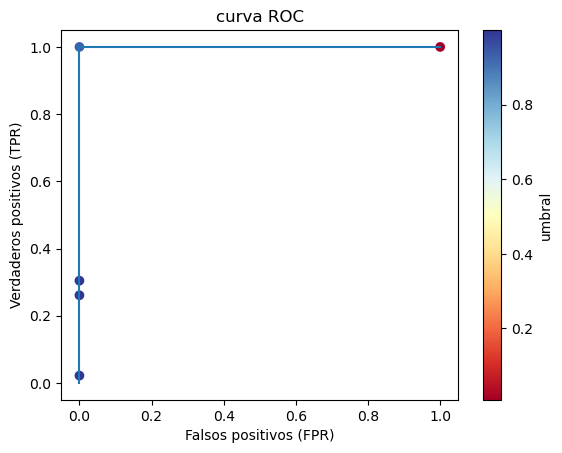

In [2]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
print(f'accuracy (precisión) = {accuracy_score(y_test,y_pred>0.5)}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()

plt.plot(fpr,tpr)
plt.scatter(fpr,tpr,c=thresholds,cmap='RdYlBu')
plt.title('curva ROC')
plt.xlabel('Falsos positivos (FPR)')
plt.ylabel('Verdaderos positivos (TPR)')
colorbar = plt.colorbar()
colorbar.set_label('umbral')
plt.show()
